# Lab 2: Convolutional Neural Network (CNN)

In [ ]:
import tensorflow as tf
(train_X, train_Y),(test_X, test_Y) = tf.keras.datasets.cifar10.load_data()

print(train_X.shape, test_X.shape)



(50000, 32, 32, 3) (10000, 32, 32, 3)


# 2.1 Dataset pre-processing
The first thing that we need to do when we are dealing with a new dataset is to operate some pre-processing operations. Data preprocessing usually refers to the steps applied to make data more suitable for learning. 
In this section we are going to deal with:
* 2.1.1 Dataset loading
* 2.1.2 Normalization
* 2.1.3 Standardization
* 2.1.4 Splitting and label preprocessing


## 2.1.1 Dataset loading
In this section we load the augmented dataset generated in the previous section

## 2.1.2 Normalization
One common practice in training a Neural Network is to normalize the images by dividing each pixel value by the maximum value that we can have, i.e. 255.<br>
The purpose of this is to obtain a mean close to 0.<br>
Normalizing the data generally speeds up learning and leads to faster convergence

In [ ]:
import numpy as np
# Normalizing the data
print("Normalizing training set..")
train_X = np.asarray(train_X, dtype=np.float32) / 255										# Normalizing training set
print("Normalizing test set..")
test_X = np.asarray(test_X, dtype=np.float32) / 255											# Normalizing test set

Normalizing training set..
Normalizing test set..


## 2.1.3 Standardization
Another common practice in data pre-processing is standardization.<br>
The idea about standardization is to compute your dataset mean and standard deviation in order to subtract from every data point $x$ the dataset mean $\mu$ and then divide by the standard deviation $\sigma$.<br>
That is to apply the following operation:<br>
<img src="https://drive.google.com/uc?id=1rpuybw_fmI8XK38JQhWWxX2TOExBAV2V" width="150px"><br>
The outcome of this operation is to obtain a distribution with mean equal to 0 and a standard deviation equal to 1.<br>
By applying normalization to our data we are making the features more similar to each other and this usually makes the learning process easier.<br>
To better understand that we can show an example of what happens after a standardization process is applied to a dataset:
<img src="https://drive.google.com/uc?id=1wtqTW4hz8n8k7b7q0mUSzCc9X0npNUY2" width="500px" align="left"><br>

In [ ]:
# Standardizing the data
def compute_mean_and_std(X):
	image_means = []
	image_stds = []

	mean = np.mean(train_X, axis=(0,1,2))
	std = np.std(train_X, axis=(0,1,2))
 
	return [mean, std]					# For every image we subtract to it the dataset mean and we divide by the dataset standard deviation


In [ ]:
dataset_mean, dataset_std = compute_mean_and_std(train_X)
print("Standardizing training set..")
train_X = (train_X-dataset_mean)/dataset_std												# Standardizing the training set
print("Standardizing test set..")
test_X = (test_X-dataset_mean)/dataset_std												# Standardizing the test set

Standardizing training set..
Standardizing test set..


## 2.1.4 Splitting and label preprocessing
Now we just need to split our training set in orer to get the validation set and convert our labels to one-hot representation

In [ ]:
# Creating the validation set
from sklearn.model_selection import train_test_split
print("Splitting training set to create validation set..")
train_X, valid_X, train_Y, valid_Y = train_test_split(train_X, train_Y, test_size=0.2, random_state=13)
print(train_X.shape)
# Converting labels to one-hot representation
from keras.utils.np_utils import to_categorical
train_Y_one_hot = to_categorical(train_Y)						# Converting training labels to one-hot representation
valid_Y_one_hot = to_categorical(valid_Y)						# Converting validation labels to one-hot representation
test_Y_one_hot = to_categorical(test_Y)							# Converting test labels to one-hot representation

Splitting training set to create validation set..
(40000, 32, 32, 3)


# 2.2 Training a model from scratch
Now that we have properly pre-processed our data, we are going to create a convolutional model in Keras. 
Usually a convolutional model is made by two subsequent part:
* A convolutional part
* A fully connected

We can show an example of the general structure in the next picture:
<img src="https://drive.google.com/uc?id=1duP8u9bs6ELNu4degUuYP4-YS1mBYn2O" width="600px"><br>

Usually the convolutional part is made by some layers composed by
* convolutional layer: performs a spatial convolution over images
* pooling layer: used to reduce the output spatial dimension from $n$ to 1 by averaging the $n$ different value or considering the maximum between them 
* dropout layer: applied to a layer, consists of randomly "dropping out" (i.e. set to zero) a number of output features of the layer during training.

The convolutional part produces its output and the fully connected part ties together the received information in order to solve the classification problem

In [ ]:
# Creating the model from scratch
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from sklearn.metrics import accuracy_score

categories = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']


# Network parameters
batch_size = 16													# Setting the batch size
epochs = 6														# Setting the number of epochs
num_classes = len(categories)									# Getting the amount of classes

scratch_model = Sequential()	

# Build here your keras model.
# Try to use one or more convolutional layer, joint with pooling layer and dropout layer
scratch_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(32, 32, 3)))
scratch_model.add(LeakyReLU(alpha=0.1))
scratch_model.add(MaxPooling2D((2, 2),padding='same'))

# Creating conv 2
scratch_model.add(Conv2D(32, (3, 3), activation='linear',padding='same'))
scratch_model.add(LeakyReLU(alpha=0.1))
scratch_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

# Adding the dense final part
scratch_model.add(Flatten())
scratch_model.add(Dense(32, activation='linear'))
scratch_model.add(LeakyReLU(alpha=0.1))
scratch_model.add(Dense(num_classes, activation='softmax'))

# Compile the model with the Adam optimizer
scratch_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

# Visualize the model through the summary function
scratch_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)             

In [ ]:
# Let's train the model!
scratch_model_history = scratch_model.fit(train_X, train_Y_one_hot, batch_size=batch_size, shuffle=True, epochs=epochs, validation_data=(valid_X, valid_Y_one_hot))

Train on 40000 samples, validate on 10000 samples
Epoch 1/6
40000/40000 [==============================] - 20s 493us/step - loss: 1.3216 - accuracy: 0.5323 - val_loss: 1.0523 - val_accuracy: 0.6324
Epoch 2/6
40000/40000 [==============================] - 19s 486us/step - loss: 0.9768 - accuracy: 0.6567 - val_loss: 0.9694 - val_accuracy: 0.6633
Epoch 3/6
40000/40000 [==============================] - 18s 460us/step - loss: 0.8442 - accuracy: 0.7049 - val_loss: 0.9063 - val_accuracy: 0.6875
Epoch 4/6
40000/40000 [==============================] - 18s 462us/step - loss: 0.7506 - accuracy: 0.7349 - val_loss: 0.9154 - val_accuracy: 0.6825
Epoch 5/6
40000/40000 [==============================] - 19s 464us/step - loss: 0.6739 - accuracy: 0.7640 - val_loss: 0.9616 - val_accuracy: 0.6857
Epoch 6/6
40000/40000 [==============================] - 19s 464us/step - loss: 0.6140 - accuracy: 0.7825 - val_loss: 0.9405 - val_accuracy: 0.6958


In [ ]:
# Getting the results
scratch_model_train_acc = scratch_model_history.history['accuracy']
scratch_model_valid_acc = scratch_model_history.history['val_accuracy']
scratch_model_train_loss = scratch_model_history.history['loss']
scratch_model_valid_loss = scratch_model_history.history['val_loss']

print("Test accuracy: ", accuracy_score(scratch_model.predict_classes(test_X), test_Y))			# Testing the model

Test accuracy:  0.6898


**Is the obtained value coherent with what you expected?**<br>
**What are the differences when using a different batch size? Why?**

# 2.3 Data Augmentation
Before even starting to load the dataset we should ask ourself whether the available amount of data is sufficient to our purposes.<br>
When the answer is negative we could need to do "data augmentation".<br>
Doing data augmentation means to increase the number of available data points. In terms of images, it may mean that increasing the number of images in the dataset. A common way to do this is to generate new images by applying a linear transformation to the original images in the dataset.<br>
The most common linear transformations are the following:<br>
* Rotation
* Shifting
* Blurring
* Change lighting conditions

In the picture below we show an example of augmentation:<br>
<img src="https://drive.google.com/uc?id=1B74snda_oJKkhVzxch9Ov8Y1XL63U3w5" width="600px" align="left"><br>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Augmentation parameters
noise_range = 5																	# Gaussian blur range
flip_hor_prob = 0.5																# Probability to flip horizontally the image
rot_range = 30																	# Rotation range

print(train_X.shape, test_X.shape)

train_data_dir = "dataset/train"
test_data_dir = "dataset/test"
cifar10_datagen = ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    #rotation_range=20,
    #width_shift_range=0.1,
    #height_shift_range=0.1,
    horizontal_flip=True)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
dataset_mean, dataset_std = compute_mean_and_std(train_X)
print("Standardizing training set..")
train_X = (train_X-dataset_mean)/dataset_std												# Standardizing the training set
print("Standardizing test set..")
test_X = (test_X-dataset_mean)/dataset_std												# Standardizing the test set


(40000, 32, 32, 3) (10000, 32, 32, 3)
Standardizing training set..
Standardizing test set..


In [ ]:
from keras.utils.np_utils import to_categorical

scratch_model = Sequential()	

# Build here your keras model.
# Try to use one or more convolutional layer, joint with pooling layer and dropout layer
scratch_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(32, 32, 3)))
scratch_model.add(LeakyReLU(alpha=0.1))
scratch_model.add(MaxPooling2D((2, 2),padding='same'))

# Creating conv 2
scratch_model.add(Conv2D(32, (3, 3), activation='linear',padding='same'))
scratch_model.add(LeakyReLU(alpha=0.1))
scratch_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

# Adding the dense final part
scratch_model.add(Flatten())
scratch_model.add(Dense(32, activation='linear'))
scratch_model.add(LeakyReLU(alpha=0.1))
scratch_model.add(Dense(num_classes, activation='softmax'))

# Compile the model with the Adam optimizer
scratch_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

# Visualize the model through the summary function
scratch_model.summary()

# fits the model on batches with real-time data augmentation:
scratch_model.fit(cifar10_datagen.flow(train_X, to_categorical(train_Y), batch_size=16), epochs=epochs)


# Getting the results
scratch_model_train_acc = scratch_model_history.history['accuracy']
scratch_model_valid_acc = scratch_model_history.history['val_accuracy']
scratch_model_train_loss = scratch_model_history.history['loss']
scratch_model_valid_loss = scratch_model_history.history['val_loss']

print("Test accuracy: ", accuracy_score(scratch_model.predict_classes(test_X), test_Y))			# Testing the model

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)             

**What is the performance obtained on this new augmented dataset?**<br>
**How can you explain the obtained result?**

# 2.4 Using a pre-trained model

A common alternative to train a model from scratch consists in using a pre-trained model.<br>
The idea is to replace the convolutional part with a highly optimized convolutional part engineered and trained previously by someone else.<br>
Usually the models that we can use through keras.applications have been trained over the image net dataset. <br>
Today we are going to use the VGG19 model. Its architecture it is shown below:
<img src="https://www.researchgate.net/profile/Clifford_Yang/publication/325137356/figure/fig2/AS:670371271413777@1536840374533/llustration-of-the-network-architecture-of-VGG-19-model-conv-means-convolution-FC-means_W640.jpg" width="600px"><br>
After the convolutional part replacement we still need to set up a fully connected part.<br>
**Why in this lab we cannot use the fully connected part of VGG19 Net?<br>
What should we do to use it?<br>
And more in general in which situations we can do that?**

Moreover, using a pre-trained network is not always the best choice<br>
**Can you guess in which situations could be useful to use a pre-trained model?**

In [ ]:
# Creating the model based over the pretrained Xception network
from keras import applications
vgg19 = applications.VGG19(weights = "imagenet", include_top=False, input_shape = (32, 32, 3))

# Producing the feature
train_X_feature = vgg19.predict(train_X)					# Producing the train feature
valid_X_feature = vgg19.predict(valid_X)					# Producing the test feature


from keras import models
from keras import layers
from keras import optimizers

# Creating a simple model that will classify the extracted features from the Xception network
pretrained_model = models.Sequential()
pretrained_model.add(layers.Flatten())
pretrained_model.add(layers.Dense(64, activation='relu'))
pretrained_model.add(layers.Dropout(0.3))
pretrained_model.add(layers.Dense(num_classes, activation='softmax'))
pretrained_model.compile(optimizer=optimizers.RMSprop(lr=2e-4),loss='categorical_crossentropy',metrics=['acc'])

In [ ]:
# Visualize the model through the summary function
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [ ]:
# Let's train the model!
pretrained_model_history = pretrained_model.fit(train_X_feature, train_Y_one_hot, epochs=epochs, batch_size=batch_size, validation_data=(valid_X_feature, valid_Y_one_hot))

Train on 40000 samples, validate on 10000 samples
Epoch 1/6
40000/40000 [==============================] - 11s 273us/step - loss: 1.6225 - acc: 0.4324 - val_loss: 1.2799 - val_acc: 0.5567
Epoch 2/6
40000/40000 [==============================] - 11s 269us/step - loss: 1.3085 - acc: 0.5440 - val_loss: 1.1815 - val_acc: 0.5900
Epoch 3/6
40000/40000 [==============================] - 11s 267us/step - loss: 1.2245 - acc: 0.5780 - val_loss: 1.1395 - val_acc: 0.6033
Epoch 4/6
40000/40000 [==============================] - 11s 265us/step - loss: 1.1806 - acc: 0.5938 - val_loss: 1.1188 - val_acc: 0.6112
Epoch 5/6
40000/40000 [==============================] - 11s 264us/step - loss: 1.1543 - acc: 0.6030 - val_loss: 1.1091 - val_acc: 0.6182
Epoch 6/6
40000/40000 [==============================] - 11s 279us/step - loss: 1.1405 - acc: 0.6113 - val_loss: 1.1026 - val_acc: 0.6190


In [ ]:
print(train_X_feature.shape)
print(train_Y_one_hot.shape)

(40000, 1, 1, 512)
(40000, 10)


In [ ]:
# Getting the results
pretrained_model_train_acc = pretrained_model_history.history['acc']
pretrained_model_valid_acc = pretrained_model_history.history['val_acc']
pretrained_model_train_loss = pretrained_model_history.history['loss']
pretrained_model_valid_loss = pretrained_model_history.history['val_loss']

test_X_feature = vgg19.predict(test_X)						# Producing the test feature
print("Test accuracy: ", accuracy_score(pretrained_model.predict_classes(test_X_feature), test_Y)) # Testing the model

Test accuracy:  0.6269


# 2.5 Comparing the models
### This part is for the students enrolled in the AML course only!
Now that we trained both the "from scratch" and the "pre-trained" models, we are going to compare the obtained results obtained during the training. We are going to consider accuracy and loss.<br>
**What can you expect from these plots?**

Producing accuracy over epochs plot
Producing loss over epochs plot


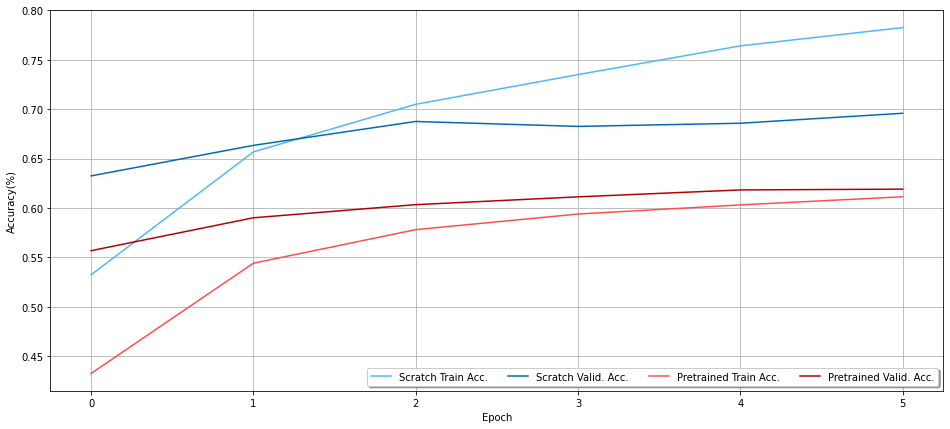

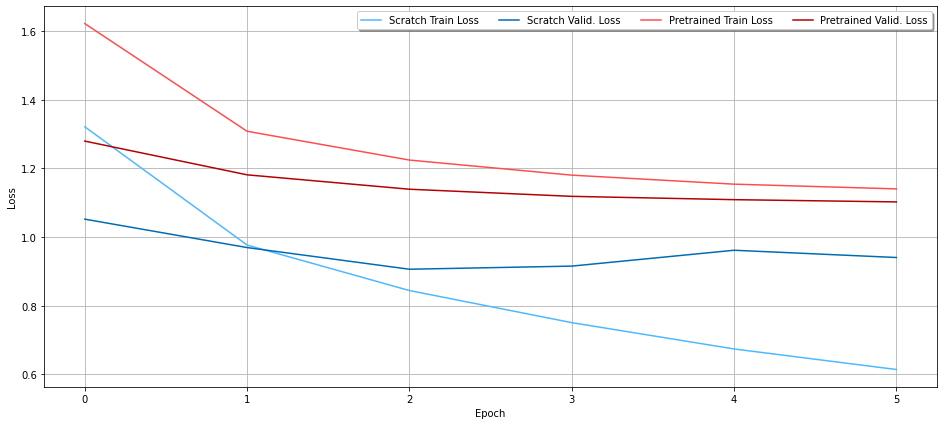

In [ ]:
# Create here the plots to compare the "from scratch" model and the "pretrained" model
# Try to produce a comparison plot about the accuracies (train and validation) and another plot for the losses
# Creating the plots to compare the "from scratch" model and the "pretrained" model
# Producing accuracy over epochs plot
print("Producing accuracy over epochs plot")
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,7))

plt.plot(scratch_model_train_acc, label="Scratch Train Acc.", color="#4db8ff")
plt.plot(scratch_model_valid_acc, label="Scratch Valid. Acc.", color="#006bb3")

plt.plot(pretrained_model_train_acc, label="Pretrained Train Acc.", color="#ff4d4d")
plt.plot(pretrained_model_valid_acc, label="Pretrained Valid. Acc.", color="#b30000")

plt.xlabel('Epoch')
plt.ylabel('Accuracy(%)')
plt.legend(loc='lower right', fancybox=True, shadow=True, ncol=4)
plt.grid()
plt.savefig('acc_epochs.png', dpi=300)


# Producing loss over epochs plot
print("Producing loss over epochs plot")
fig = plt.figure(figsize=(16,7))

plt.plot(scratch_model_train_loss, label="Scratch Train Loss", color="#4db8ff")
plt.plot(scratch_model_valid_loss, label="Scratch Valid. Loss", color="#006bb3")

plt.plot(pretrained_model_train_loss, label="Pretrained Train Loss", color="#ff4d4d")
plt.plot(pretrained_model_valid_loss, label="Pretrained Valid. Loss", color="#b30000")

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right', fancybox=True, shadow=True, ncol=4)
plt.grid()
plt.savefig('loss_epochs.png', dpi=300)








**What information can you get from these plots?**<br>
**Are they showing what you expected?**